In [1]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# import data

In [2]:
raw_t0 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T0')
raw_t1 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T1')

raw = pd.concat([raw_t0, raw_t1], axis=0, ignore_index=True)
raw.head()

,ppID,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,...,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,sparc_x,sparc_y,sparc_z,sparc_res,LDLJ_A
0,BC_008,F_R_001,T0,3.834831,1.480221,1.663549,3.465609,0.681054,0.897372,0.471789,...,4.587295,5.929575,0.569263,0.278274,0.773630,-5.508481,-3.234466,-4.580467,-2.397626,-7.094663
1,BC_009,F_L_001,T0,2.918751,2.471717,2.810934,1.967558,0.719471,0.711186,0.577297,...,3.347652,4.339429,0.439843,0.459787,0.771450,-3.993691,-2.928549,-3.705128,-2.202665,-7.167135
2,BC_010,F_L_001,T0,3.486245,1.548177,2.439655,1.523149,0.858305,0.657536,0.627919,...,3.932702,5.501325,0.393565,0.577992,0.714865,-5.249112,-5.205257,-5.421431,-3.154271,-7.135506
3,BC_011,F_L_001,T0,2.905801,2.352076,1.537338,4.847863,0.718415,0.676335,0.634100,...,3.000306,4.703488,0.491233,0.593116,0.637890,-3.207395,-2.970358,-3.146702,-1.972478,-7.124737
4,BC_012,F_R_001,T0,2.704405,2.743215,2.781071,3.409076,0.995385,1.238772,0.704612,...,4.002221,5.195600,0.537082,0.343753,0.770310,-3.688022,-2.617708,-3.763334,-2.045856,-7.285776


In [3]:
len(raw_t0)

10

### create datafram with index

In [4]:
df = raw.iloc[0:,1:]
df.index = raw.iloc[0:,0]
df.head()

,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,sparc_x,sparc_y,sparc_z,sparc_res,LDLJ_A
ppID,,,,,,,,,,,,,,,,,,,,,
BC_008,F_R_001,T0,3.834831,1.480221,1.663549,3.465609,0.681054,0.897372,0.471789,0.626451,...,4.587295,5.929575,0.569263,0.278274,0.773630,-5.508481,-3.234466,-4.580467,-2.397626,-7.094663
BC_009,F_L_001,T0,2.918751,2.471717,2.810934,1.967558,0.719471,0.711186,0.577297,0.847650,...,3.347652,4.339429,0.439843,0.459787,0.771450,-3.993691,-2.928549,-3.705128,-2.202665,-7.167135
BC_010,F_L_001,T0,3.486245,1.548177,2.439655,1.523149,0.858305,0.657536,0.627919,0.792375,...,3.932702,5.501325,0.393565,0.577992,0.714865,-5.249112,-5.205257,-5.421431,-3.154271,-7.135506
BC_011,F_L_001,T0,2.905801,2.352076,1.537338,4.847863,0.718415,0.676335,0.634100,0.839723,...,3.000306,4.703488,0.491233,0.593116,0.637890,-3.207395,-2.970358,-3.146702,-1.972478,-7.124737
BC_012,F_R_001,T0,2.704405,2.743215,2.781071,3.409076,0.995385,1.238772,0.704612,0.999543,...,4.002221,5.195600,0.537082,0.343753,0.770310,-3.688022,-2.617708,-3.763334,-2.045856,-7.285776


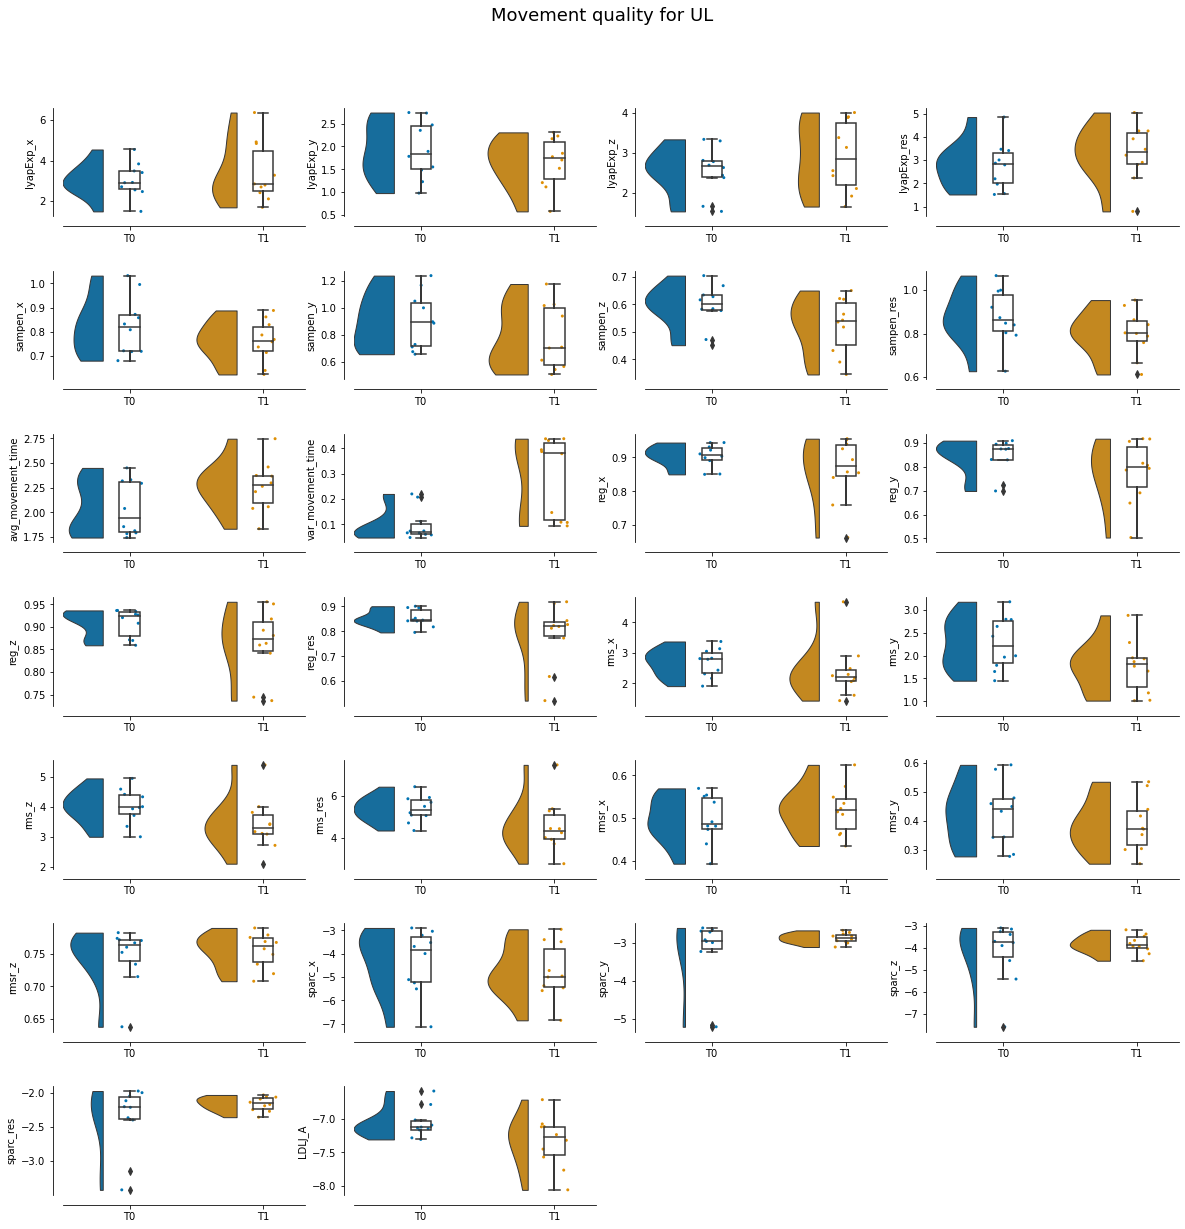

In [5]:
X = df.drop(['trial','time'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')

Berekening sample entropy:
* tollerantie op basis van het signaal r*std(signaal) --> zeer signaal specifiek

* tollerantie met een vaste waarde r = 0.2 --> mogelijk grotere kans om verschillen te vinden

* tollerantie bepaald op pre-op data en dan diezelfde tollerantie gebruiken voor de pre en post op metingen. --> individueel maar mogelijk toch makkelijker verschil tussen pre en post op te vinden!

# Statistical anlysis
### Pre-op vs Post-op on 20 participants as a first analysis method

In [6]:
# find outliers

In [7]:
T0 = df.loc[df['time']=='T0']
T1 = df.loc[df['time']=='T1']
timepoints = ['T0', 'T1']

for var in df.columns:
    print('Analyzing {}'.format(var))
    if var == 'trial' or var == 'time':
        print(80* "_" + "\n" )
    else:
        t_statistic, pvalue = stats.ttest_rel(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
                      
            
        

Analyzing trial
________________________________________________________________________________

Analyzing time
________________________________________________________________________________

Analyzing lyapExp_x
-0.791978969500703 0.4487
________________________________________________________________________________

Analyzing lyapExp_y
1.2882831898337517 0.2298
________________________________________________________________________________

Analyzing lyapExp_z
-1.3943432825927902 0.1967
________________________________________________________________________________

Analyzing lyapExp_res
-1.4721885236662966 0.1751
________________________________________________________________________________

Analyzing sampen_x
1.37482052166403 0.2024
________________________________________________________________________________

Analyzing sampen_y
2.0758358795936913 0.0677
________________________________________________________________________________

Analyzing sampen_z
2.450186764503928 